In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-04-04 19:31:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [text/plain]
Saving to: 'adult.data'

100%[======================================>] 3,974,305   2.79MB/s   in 1.4s   

2019-04-04 19:31:55 (2.79 MB/s) - 'adult.data' saved [3974305/3974305]



In [93]:
import pandas as pd

In [150]:
data = pd.read_csv("adult.data", header=None)

In [151]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [152]:
data.dtypes

0      int64
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10     int64
11     int64
12     int64
13    object
14    object
dtype: object

In [154]:
data.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country", "Income"]

In [155]:
column_types = data.dtypes
for i,column in enumerate(data.columns):
    if column_types[i] == object:
        data[column] = data[column].astype('category').cat.codes
        

In [156]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [157]:
y = data.pop("Income")
X = data.copy()

In [158]:
for i,column in enumerate(X.columns):
    if len(X[column].unique())<10:
        dummy = pd.get_dummies(X[column])
        X = pd.concat([X, dummy], axis=1)
        

In [ ]:
%matplotlib inline

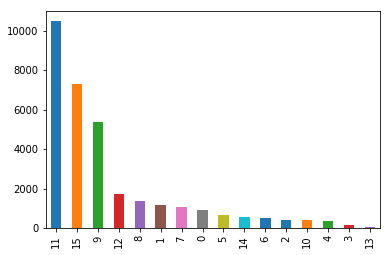

In [133]:
X["education"].value_counts().plot(kind="bar")

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
clf = RandomForestClassifier(n_estimators=50, max_depth=4, random_state=0)

In [127]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [128]:
from sklearn.metrics import confusion_matrix

In [129]:
confusion_matrix(y_test, clf.predict(X_test), labels=None, sample_weight=None)

array([[7953,  243],
       [1458, 1092]])